Checking for data reliability using Benford's law.

https://en.wikipedia.org/wiki/Benford%27s_law

In [1]:
!wget -N https://covid.ourworldindata.org/data/owid-covid-data.csv

--2023-03-20 09:23:48--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 188.114.97.0, 188.114.96.0, 2a06:98c1:3120::, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|188.114.97.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘owid-covid-data.csv’

owid-covid-data.csv     [            <=>     ]  75.78M  33.8MB/s    in 2.2s    

Last-modified header missing -- time-stamps turned off.
2023-03-20 09:23:50 (33.8 MB/s) - ‘owid-covid-data.csv’ saved [79457142]



In [2]:
import pandas as pd
import numpy  as np

%matplotlib inline

In [3]:
df = pd.read_csv(
    'owid-covid-data.csv',
    keep_default_na = False,
    na_values       = '',
    parse_dates     = [3],
    dayfirst        = True,
)

# show the last rows as columns in reverse order
(
    df
    .tail(5)
    .transpose()
    .iloc[:, ::-1]
)

295750  \
iso_code                                                 ZWE   
continent                                             Africa   
location                                            Zimbabwe   
date                                     2023-03-16 00:00:00   
total_cases                                         264391.0   
...                                                      ...   
population                                        16320539.0   
excess_mortality_cumulative_absolute                     NaN   
excess_mortality_cumulative                              NaN   
excess_mortality                                         NaN   
excess_mortality_cumulative_per_million                  NaN   

                                                      295749  \
iso_code                                                 ZWE   
continent                                             Africa   
location                                            Zimbabwe   
date                                     2023-03-15 00:00:00   
total_cases                                         264391.0   
...                                                      ...   
population                                        16320539.0   
excess_mortality_cumulative_absolute                     NaN   
excess_mortality_cumulative                              NaN   
excess_mortality                                         NaN   
excess_mortality_cumulative_per_million                  NaN   

                                                      295748  \
iso_code                                                 ZWE   
continent                                             Africa   
location                                            Zimbabwe   
date                                     2023-03-14 00:00:00   
total_cases                                         264391.0   
...                                                      ...   
population                                        16320539.0   
excess_mortality_cumulative_absolute                     NaN   
excess_mortality_cumulative                              NaN   
excess_mortality                                         NaN   
excess_mortality_cumulative_per_million                  NaN   

                                                      295747  \
iso_code                                                 ZWE   
continent                                             Africa   
location                                            Zimbabwe   
date                                     2023-03-13 00:00:00   
total_cases                                         264391.0   
...                                                      ...   
population                                        16320539.0   
excess_mortality_cumulative_absolute                     NaN   
excess_mortality_cumulative                              NaN   
excess_mortality                                         NaN   
excess_mortality_cumulative_per_million                  NaN   

                                                      295746  
iso_code                                                 ZWE  
continent                                             Africa  
location                                            Zimbabwe  
date                                     2023-03-12 00:00:00  
total_cases                                         264385.0  
...                                                      ...  
population                                        16320539.0  
excess_mortality_cumulative_absolute                     NaN  
excess_mortality_cumulative                              NaN  
excess_mortality                                         NaN  
excess_mortality_cumulative_per_million                  NaN  

[67 rows x 5 columns]

Checking Benford's law for all figures. For a continent check, change the first line to something like `df['continentExp'] == 'Europe'`. We use a `lambda` function to select the first character, count the occurrences, and calculate the relative number. Then we create a column according to Benford's law as a reference and plot both.

<AxesSubplot: xlabel='Benford'>

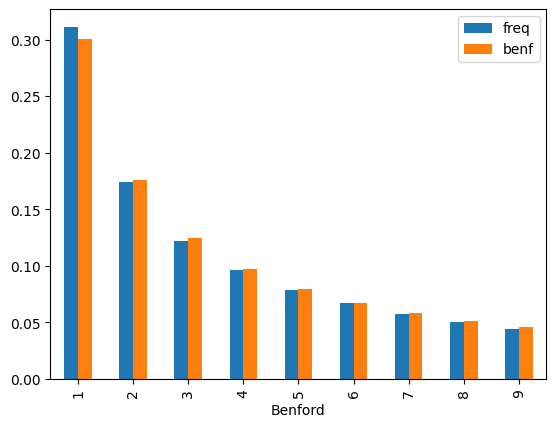

In [4]:
df['Benford'] = (
    df
    [
        (
            df
            ['new_cases']
            > 0
        )
        &
        (
            df
            ['continent']
            != ''
        )
    ]
    ['new_cases']
    .apply(
        lambda x: str(x)[0]
    )
)
df['count'] = 1
df_benf = (
    df
    [
        [
            'Benford',
            'count',
        ]
    ]
    .groupby(
        by='Benford',
    )
    .sum()
)
df_benf['freq'] = (
    (
        df_benf
        ['count']
    )
    /
    (
        df_benf
        ['count']
        .sum()
    )
)
df_benf['benf'] = np.log10(
    1 +
    1 /
    (
        df_benf
        .index
        .values
        .astype(float)
    )
)
(
    df_benf
    [
        [
            'freq',
            'benf',
        ]
    ]
    .plot(
        kind='bar',
    )
)

Kolmogorov-Smirnov is an easy way to compare two distributions by calculating the maximum difference between the cumulative values, where `0` is exact correspondence.

In [5]:
KS = (
    abs(
        (
            df_benf
            ['freq']
            .cumsum()
        )
        -
        (
            df_benf
            ['benf']
            .cumsum()
        )
    )
    .max()
)
print(
    'KS = {:1.3f}'
    .format(
        KS,
    )
)

KS = 0.010
